<a href="https://colab.research.google.com/github/gokul8747/GWL_Forecasting/blob/main/GWL_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Loading Data

In [ ]:
data_path = r'/content/HIL_gwl_v3.csv'
data = pd.read_csv(data_path,index_col='date')
data.index = pd.to_datetime(data.index)

In [ ]:
data['weekday'] = data.index.weekday.values
data['lag_1'] = data['level (m)'].shift(1)
data.dropna(inplace=True)

In [ ]:
data.describe()

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light,weekday,lag_1
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,117.800000,9.679572,26.163038,3.809076,4.099924,17.708051,43413.143165,2.984810,9.672002
std,33.550825,2.873013,4.088488,9.323256,1.156677,3.949891,3323.673975,2.003746,2.870233
min,0.000000,6.032500,17.600000,0.000000,0.920000,3.570000,38961.130000,0.000000,6.032500
25%,122.500000,6.932500,23.100000,0.000000,3.225000,15.145000,40033.230000,1.000000,6.932500
50%,128.000000,9.125000,26.900000,0.000000,4.040000,17.670000,43212.550000,3.000000,9.125000
75%,133.000000,12.605000,29.000000,3.265000,4.795000,20.615000,46679.765000,5.000000,12.605000
max,147.000000,14.800000,35.000000,104.350000,7.320000,25.570000,48388.470000,6.000000,14.800000


# Scatter Plot of Predictors with target variable

In [ ]:
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(data)

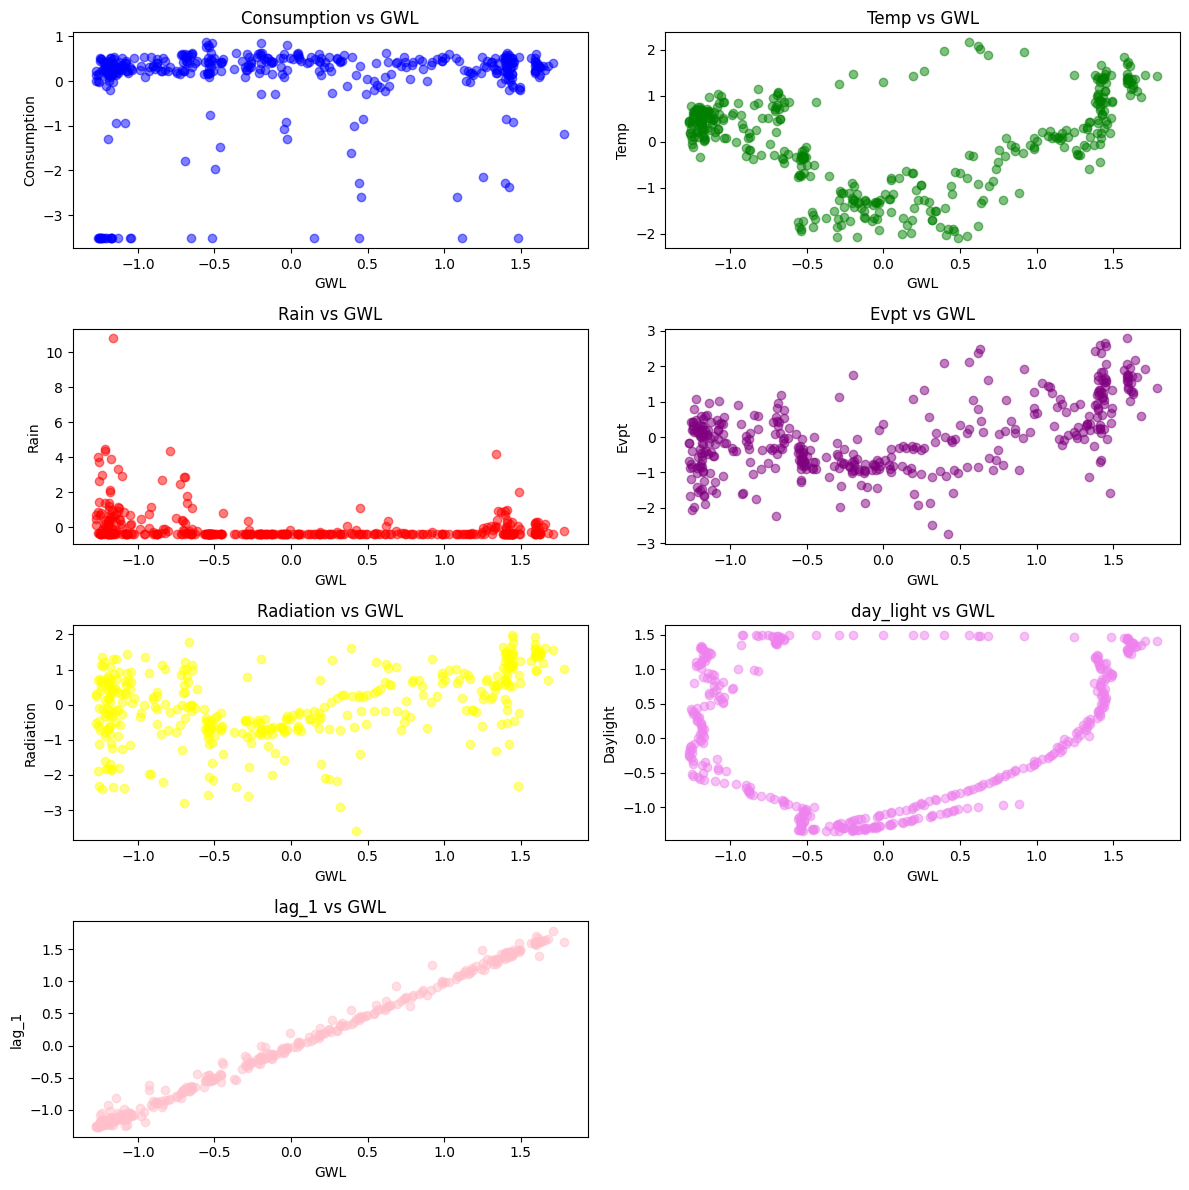

In [ ]:
# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.flatten()

# Plot the original data
axes[0].scatter(scaled_data[:,1], scaled_data[:, 0], color='blue', alpha=0.5)
axes[0].set_title('Consumption vs GWL')
axes[0].set_xlabel('GWL')
axes[0].set_ylabel('Consumption')

axes[1].scatter(scaled_data[:,1], scaled_data[:, 2], color='green', alpha=0.5)
axes[1].set_title('Temp vs GWL')
axes[1].set_xlabel('GWL')
axes[1].set_ylabel('Temp')

axes[2].scatter(scaled_data[:,1], scaled_data[:, 3], color='red', alpha=0.5)
axes[2].set_title('Rain vs GWL')
axes[2].set_xlabel('GWL')
axes[2].set_ylabel('Rain')

axes[3].scatter(scaled_data[:,1], scaled_data[:, 4], color='purple', alpha=0.5)
axes[3].set_title('Evpt vs GWL')
axes[3].set_xlabel('GWL')
axes[3].set_ylabel('Evpt')

axes[4].scatter(scaled_data[:,1], scaled_data[:, 5], color='yellow', alpha=0.5)
axes[4].set_title('Radiation vs GWL')
axes[4].set_xlabel('GWL')
axes[4].set_ylabel('Radiation')

axes[5].scatter(scaled_data[:,1], scaled_data[:, 6], color='violet', alpha=0.5)
axes[5].set_title('day_light vs GWL')
axes[5].set_xlabel('GWL')
axes[5].set_ylabel('Daylight')

axes[6].scatter(scaled_data[:,1], scaled_data[:, 8], color='pink', alpha=0.5)
axes[6].set_title('lag_1 vs GWL')
axes[6].set_xlabel('GWL')
axes[6].set_ylabel('lag_1')

# Hide the empty subplot
fig.delaxes(axes[7])

# Adjust layout
plt.tight_layout()
plt.show()


# Splitting Data into Predictors and Target

In [ ]:
predictors = [col for col in data.columns if col not in ['level (m)']]
target = 'level (m)'

In [ ]:
x_data = data[predictors]
y_data = data[target]

# Train and Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)

In [ ]:
pred_data = pd.DataFrame(y_test)

# 1. MLR Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred_train_mlr = model_mlr.predict(X_train)
y_pred_test_mlr = model_mlr.predict(X_test)

In [ ]:
y_pred_train_mlr = model_mlr.predict(X_train)
y_pred_test_mlr = model_mlr.predict(X_test)

## 1.2 MLR Prediction

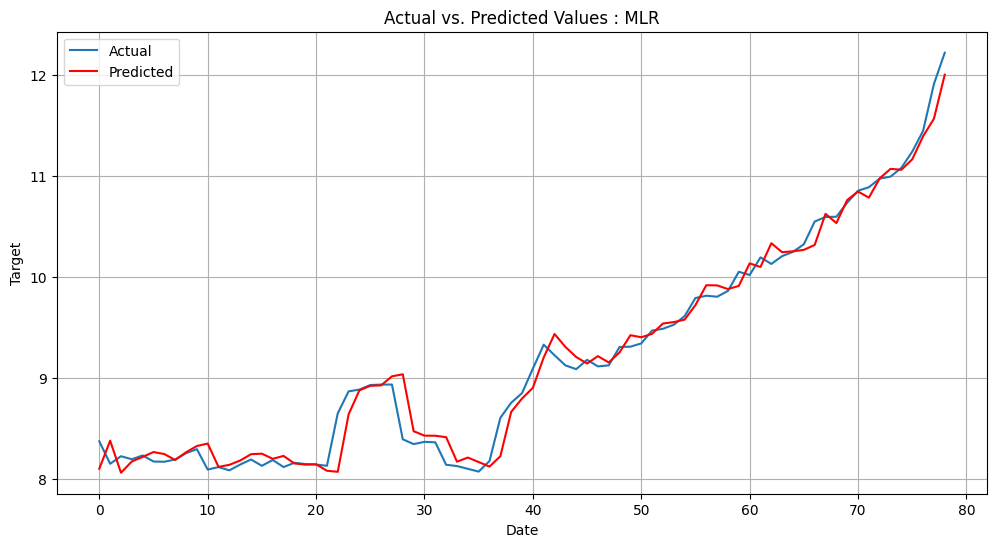

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test_mlr, label='Predicted', color='red')
plt.title('Actual vs. Predicted Values : MLR')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


## 1.3 MLR Model Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_mlr = mean_squared_error(y_train, y_pred_train_mlr)
mse_test_mlr = mean_squared_error(y_test, y_pred_test_mlr)

# Calculate RMSE
rmse_train_mlr = np.sqrt(mse_train_mlr)
rmse_test_mlr = np.sqrt(mse_test_mlr)

# Calculate R²
r2_train_mlr = r2_score(y_train, y_pred_train_mlr)
r2_test_mlr = r2_score(y_test, y_pred_test_mlr)

# Calculate MAE
mae_train_mlr = mean_absolute_error(y_train, y_pred_train_mlr)
mae_test_mlr = mean_absolute_error(y_test, y_pred_test_mlr)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_mlr = mean_absolute_percentage_error(y_train, y_pred_train_mlr)
mape_test_mlr = mean_absolute_percentage_error(y_test, y_pred_test_mlr)

# Print the metrics
print(f'Training MSE: {mse_train_mlr}')
print(f'Testing MSE: {mse_test_mlr}')
print(f'Training RMSE: {rmse_train_mlr}')
print(f'Testing RMSE: {rmse_test_mlr}')
print(f'Training R²: {r2_train_mlr}')
print(f'Testing R²: {r2_test_mlr}')
print(f'Training MAE: {mae_train_mlr}')
print(f'Testing MAE: {mae_test_mlr}')
print(f'Training MAPE: {mape_train_mlr}')
print(f'Testing MAPE: {mape_test_mlr}')


Training MSE: 0.03205028059870166
Testing MSE: 0.024228935950793874
Training RMSE: 0.17902592158316533
Testing RMSE: 0.15565646774481898
Training R²: 0.996773470520235
Testing R²: 0.9789879257169336
Training MAE: 0.11254386666864115
Testing MAE: 0.10288332331037794
Training MAPE: 1.3381739628278426
Testing MAPE: 1.1360696513479376


## 1.4 MLR Actual vs Predicted Scatter plot

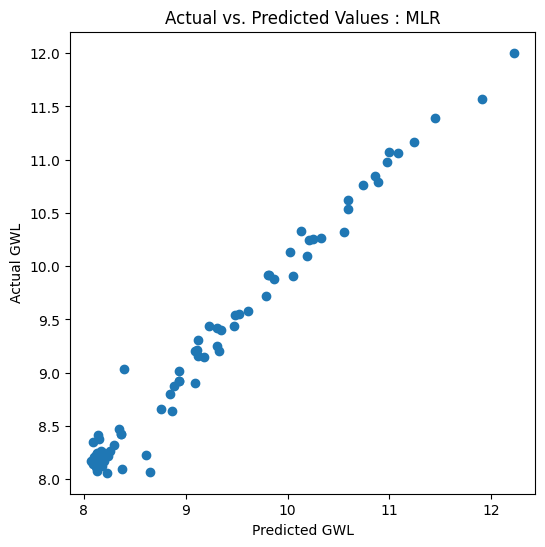

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test.values,y_pred_test_mlr)
plt.title('Actual vs. Predicted Values : MLR')
plt.xlabel('Predicted GWL')
plt.ylabel('Actual GWL')
plt.show()

## 1.5 MLR Cross-Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

mlr_rmse_scores = []

for train_idx, test_idx in tscv.split(x_data):
    X_train_cv, X_test_cv = x_data.iloc[train_idx], x_data.iloc[test_idx]
    y_train_cv, y_test_cv = y_data.iloc[train_idx], y_data.iloc[test_idx]

    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    y_pred = model.predict(X_test_cv)

    rmse = mean_squared_error(y_test_cv, y_pred, squared=False)
    mlr_rmse_scores.append(rmse)

average_rmse = np.mean(mlr_rmse_scores)
print(f'Average RMSE: {average_rmse}')


Average RMSE: 0.2296682117973965


# 2. RFR Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest Regressor model
rfr_model = RandomForestRegressor(random_state=42)
tscv = TimeSeriesSplit(n_splits=5)
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rfr_model, param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
results = grid_search.cv_results_

In [ ]:
results['rank_test_score']

array([61, 16,  2, 53, 11,  8, 71, 28, 25, 73, 55, 38, 59, 14,  6, 79, 40,
       44, 64, 47, 18, 64, 47, 18, 76, 31, 34, 63, 24, 10, 46,  5,  1, 70,
       30, 27, 75, 57, 37, 58, 13,  4, 79, 40, 43, 64, 47, 18, 64, 47, 18,
       76, 31, 34, 61, 16,  2, 53, 11,  8, 71, 28, 25, 73, 55, 38, 59, 14,
        6, 79, 40, 44, 64, 47, 18, 64, 47, 18, 76, 31, 34], dtype=int32)

In [ ]:
values = {1,2,3,4,5}  # Using a set for fast membership checking

# Indices of the values
indices = [index for index, value in enumerate(results['rank_test_score'] ) if value in values]

print("Indices:", indices)


Indices: [2, 31, 32, 41, 56]


In [ ]:
results['']

7.838389320296413

In [ ]:
results['mean_test_score'][2]

-4.432250901513092

In [ ]:
params = {}
for i,j in enumerate(indices):
  params[i+1] = results['params'][j]
  params[i+1]['mean_test_score'] = results['mean_test_score'][j]

In [ ]:
params

{1: {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300,
  'mean_test_score': -4.432250901513092},
 2: {'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200,
  'mean_test_score': -4.436118080696483},
 3: {'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 300,
  'mean_test_score': -4.431973774523508},
 4: {'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 300,
  'mean_test_score': -4.435936555853096},
 5: {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300,
  'mean_test_score': -4.432250901513092}}

In [ ]:
rfr_pd = pd.DataFrame(params)

In [ ]:
rfr_pd

,1,2,3,4,5
max_depth,NaN,10.000000,10.000000,10.000000,20.000000
min_samples_leaf,1.000000,1.000000,1.000000,2.000000,1.000000
min_samples_split,2.000000,5.000000,5.000000,5.000000,2.000000
n_estimators,300.000000,200.000000,300.000000,300.000000,300.000000
mean_test_score,-4.432251,-4.436118,-4.431974,-4.435937,-4.432251


In [ ]:
results

{'mean_fit_time': array([0.29446635, 0.60467157, 0.55076857, 0.16232338, 0.32833557,
        0.4797739 , 0.16215072, 0.32471685, 0.78982306, 0.27427106,
        0.33346534, 0.46711693, 0.15435057, 0.32585649, 0.46898904,
        0.15059795, 0.49679065, 0.68325872, 0.15184937, 0.31732755,
        0.46425261, 0.16091218, 0.33196177, 0.49952807, 0.28338208,
        0.52183814, 0.48118644, 0.18460522, 0.34225297, 0.51243873,
        0.17800908, 0.39706593, 0.85673175, 0.18880172, 0.30230184,
        0.46520119, 0.16582775, 0.33599739, 0.47208204, 0.22902508,
        0.55879941, 0.59623256, 0.14604235, 0.29835725, 0.4702589 ,
        0.17391114, 0.29998598, 0.63444815, 0.27560029, 0.39637632,
        0.46082869, 0.146977  , 0.30613484, 0.48126383, 0.18111997,
        0.48570046, 0.75993962, 0.16085763, 0.32633781, 0.4924541 ,
        0.16058636, 0.33938532, 0.58545518, 0.29614596, 0.51920657,
        0.51536474, 0.1555831 , 0.31701927, 0.45602527, 0.15108509,
        0.34835753, 0.79348974,

In [ ]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
best_params_rfr = {'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}


model_rfr = RandomForestRegressor(**best_params_rfr, random_state=42)
model_rfr.fit(X_train, y_train)

y_pred_train_rfr = model_rfr.predict(X_train)
y_pred_test_rfr = model_rfr.predict(X_test)

## 2.1 RFR Prediction

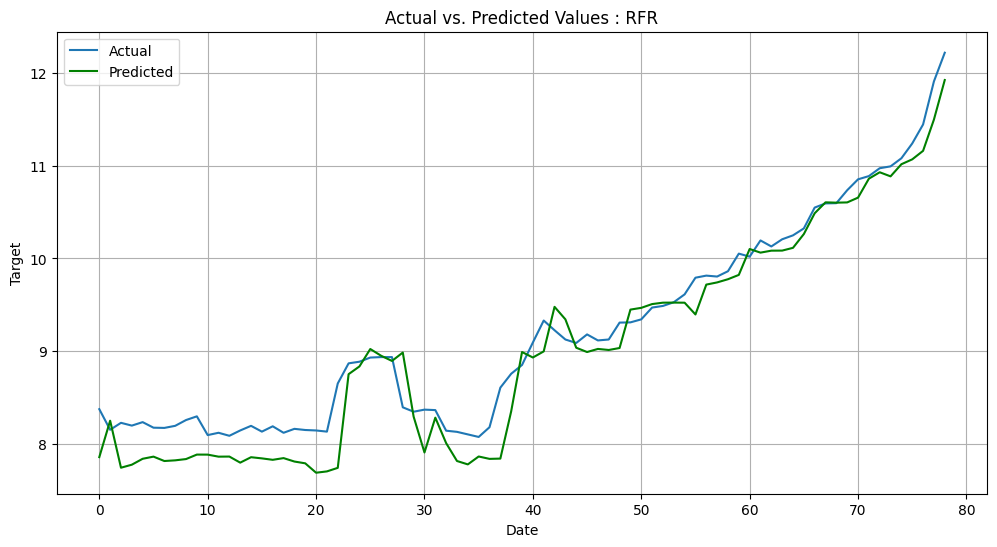

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test_rfr, label='Predicted', color='green')
plt.title('Actual vs. Predicted Values : RFR')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

## 2.2 RFR Model Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_rfr = mean_squared_error(y_train, y_pred_train_rfr)
mse_test_rfr = mean_squared_error(y_test, y_pred_test_rfr)

# Calculate RMSE
rmse_train_rfr = np.sqrt(mse_train_rfr)
rmse_test_rfr = np.sqrt(mse_test_rfr)

# Calculate R²
r2_train_rfr = r2_score(y_train, y_pred_train_rfr)
r2_test_rfr = r2_score(y_test, y_pred_test_rfr)

# Calculate MAE
mae_train_rfr = mean_absolute_error(y_train, y_pred_train_rfr)
mae_test_rfr = mean_absolute_error(y_test, y_pred_test_rfr)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_rfr = mean_absolute_percentage_error(y_train, y_pred_train_rfr)
mape_test_rfr = mean_absolute_percentage_error(y_test, y_pred_test_rfr)

# Print the metrics
print(f'Training MSE: {mse_train_rfr}')
print(f'Testing MSE: {mse_test_rfr}')
print(f'Training RMSE: {rmse_train_rfr}')
print(f'Testing RMSE: {rmse_test_rfr}')
print(f'Training R²: {r2_train_rfr}')
print(f'Testing R²: {r2_test_rfr}')
print(f'Training MAE: {mae_train_rfr}')
print(f'Testing MAE: {mae_test_rfr}')
print(f'Training MAPE: {mape_train_rfr}')
print(f'Testing MAPE: {mape_test_rfr}')


Training MSE: 0.009241682644814612
Testing MSE: 0.08417778549492119
Training RMSE: 0.09613367071330738
Testing RMSE: 0.29013408192579027
Training R²: 0.9990696318116686
Testing R²: 0.9269984498949753
Training MAE: 0.06108982336311706
Testing MAE: 0.22958134893280582
Training MAPE: 0.7140989131462236
Testing MAPE: 2.620672870206073


## 2.3 RFR Actual vs Predicted Scatter Plot

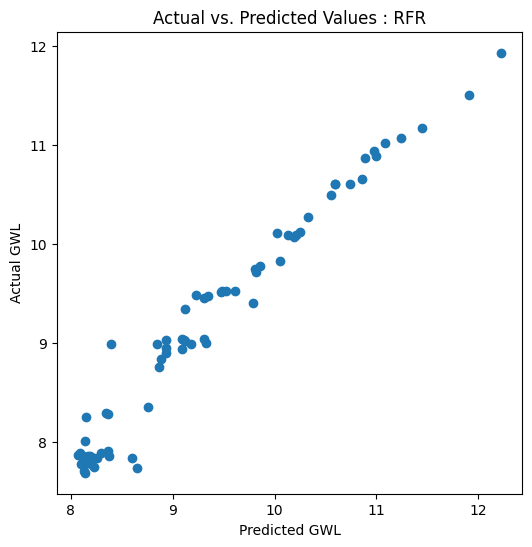

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test.values,y_pred_test_rfr)
plt.title('Actual vs. Predicted Values : RFR')
plt.xlabel('Predicted GWL')
plt.ylabel('Actual GWL')
plt.show()

## 2.4 RFR Cross-Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation metrics for each split
rfr_rmse_scores = []

# Perform Time Series Cross-Validation
for train_idx, test_idx in tscv.split(x_data):
    # Split data into training and testing sets for this split
    X_train_cv, X_test_cv = x_data.iloc[train_idx], x_data.iloc[test_idx]
    y_train_cv, y_test_cv = y_data.iloc[train_idx], y_data.iloc[test_idx]

    best_params_rfr = {'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

    model_rfr = RandomForestRegressor(**best_params_rfr, random_state=42)
    model_rfr.fit(X_train_cv, y_train_cv)
    # Predict on testing set
    y_pred = model_rfr.predict(X_test_cv)

    # Compute RMSE for this split
    rmse = mean_squared_error(y_test_cv, y_pred, squared=False)
    rfr_rmse_scores.append(rmse)

# Calculate average RMSE across all splits
average_rmse = np.mean(rfr_rmse_scores)
print(f'Average RMSE: {average_rmse}')


Average RMSE: 1.033950599214104


# 3. **XGBR** Model Training

In [ ]:
import xgboost as xgb

In [ ]:

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBRegressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV with XGBRegressor and TimeSeriesSplit
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
results = grid_search.cv_results_

In [ ]:
values = {1,2,3,4,5}  # Using a set for fast membership checking

# Indices of the values
indices = [index for index, value in enumerate(results['rank_test_score'] ) if value in values]

print("Indices:", indices)


Indices: [298, 302, 305, 306, 315]


In [ ]:
params = {}
for i,j in enumerate(indices):
  params[i+1] = results['params'][j]
  params[i+1]['mean_test_score'] = results['mean_test_score'][j]

In [ ]:
params

{1: {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.2,
  'max_depth': 3,
  'min_child_weight': 1,
  'subsample': 0.8,
  'mean_test_score': -5.153502060572624},
 2: {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.2,
  'max_depth': 3,
  'min_child_weight': 3,
  'subsample': 1.0,
  'mean_test_score': -5.101402453148232},
 3: {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.2,
  'max_depth': 3,
  'min_child_weight': 5,
  'subsample': 1.0,
  'mean_test_score': -5.145777125160653},
 4: {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.2,
  'max_depth': 5,
  'min_child_weight': 1,
  'subsample': 0.6,
  'mean_test_score': -5.150989105747174},
 5: {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.2,
  'max_depth': 7,
  'min_child_weight': 1,
  'subsample': 0.6,
  'mean_test_score': -5.1516959810541945}}

In [ ]:
pd.DataFrame(params)

,1,2,3,4,5
colsample_bytree,0.800000,0.800000,0.800000,0.800000,0.800000
gamma,0.000000,0.000000,0.000000,0.000000,0.000000
learning_rate,0.200000,0.200000,0.200000,0.200000,0.200000
max_depth,3.000000,3.000000,3.000000,5.000000,7.000000
min_child_weight,1.000000,3.000000,5.000000,1.000000,1.000000
subsample,0.800000,1.000000,1.000000,0.600000,0.600000
mean_test_score,-5.153502,-5.101402,-5.145777,-5.150989,-5.151696


In [ ]:
results['rank_test_score']

In [ ]:
best_params

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 1.0}

In [ ]:
best_params = {'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 1.0}

model_xgbr = xgb.XGBRegressor(**best_params,objective='reg:squarederror', n_estimators=1000)
model_xgbr.fit(X_train, y_train)

# Make predictions
y_pred_train_xgbr = model_xgbr.predict(X_train)
y_pred_test_xgbr = model_xgbr.predict(X_test)

In [ ]:
pred_data['XGBR'] = y_pred_test_xgbr

In [ ]:
lr = LinearRegression()
lr.fit(y_pred_test_xgbr.reshape(-1,1),y_test)
lr_line = lr.predict(y_pred_test_xgbr.reshape(-1, 1))

In [ ]:
pred_data['XGBR_line'] = lr_line

## 3.1 XGBR Prediction

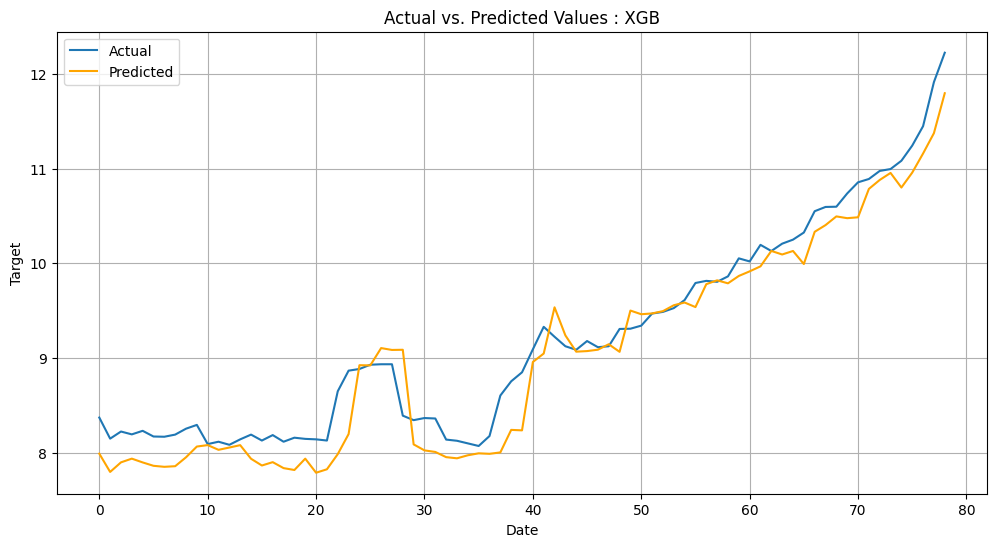

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test_xgbr, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Values : XGB')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


## 3.2 XGBR Model Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_xgbr = mean_squared_error(y_train, y_pred_train_xgbr)
mse_test_xgbr = mean_squared_error(y_test, y_pred_test_xgbr)

# Calculate RMSE
rmse_train_xgbr = np.sqrt(mse_train_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)

# Calculate R²
r2_train_xgbr = r2_score(y_train, y_pred_train_xgbr)
r2_test_xgbr = r2_score(y_test, y_pred_test_xgbr)

# Calculate MAE
mae_train_xgbr = mean_absolute_error(y_train, y_pred_train_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, y_pred_test_xgbr)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_xgbr = mean_absolute_percentage_error(y_train, y_pred_train_xgbr)
mape_test_xgbr = mean_absolute_percentage_error(y_test, y_pred_test_xgbr)

# Print the metrics
print(f'Training MSE: {mse_train_xgbr}')
print(f'Testing MSE: {mse_test_xgbr}')
print(f'Training RMSE: {rmse_train_xgbr}')
print(f'Testing RMSE: {rmse_test_xgbr}')
print(f'Training R²: {r2_train_xgbr}')
print(f'Testing R²: {r2_test_xgbr}')
print(f'Training MAE: {mae_train_xgbr}')
print(f'Testing MAE: {mae_test_xgbr}')
print(f'Training MAPE: {mape_train_xgbr}')
print(f'Testing MAPE: {mape_test_xgbr}')


Training MSE: 3.6389440381379638e-06
Testing MSE: 0.0786559010085698
Training RMSE: 0.0019076016455586223
Testing RMSE: 0.28045659380476295
Training R²: 0.9999996336643551
Testing R²: 0.931787197004851
Training MAE: 0.0013775228634880514
Testing MAE: 0.22461076591588267
Training MAPE: 0.01563149970377052
Testing MAPE: 2.496405192749869


## 3.3 XGBR Actual vs Prediction Scatter plot

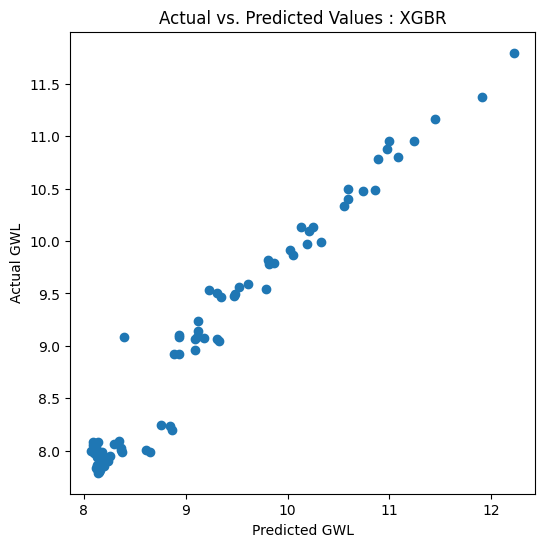

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test.values,y_pred_test_xgbr)
plt.title('Actual vs. Predicted Values : XGBR')
plt.xlabel('Predicted GWL')
plt.ylabel('Actual GWL')
plt.show()

## 3.4 XGBR Cross-Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation metrics for each split
xg_rmse_scores = []

# Perform Time Series Cross-Validation
for train_idx, test_idx in tscv.split(x_data):
    # Split data into training and testing sets for this split
    X_train_cv, X_test_cv = x_data.iloc[train_idx], x_data.iloc[test_idx]
    y_train_cv, y_test_cv = y_data.iloc[train_idx], y_data.iloc[test_idx]

    best_params = {'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1,
 'subsample': 0.6}

    model_xgbr = xgb.XGBRegressor(**best_params,objective='reg:squarederror', n_estimators=1000)
    model_xgbr.fit(X_train_cv, y_train_cv)
    # Predict on testing set
    y_pred = model_xgbr.predict(X_test_cv)

    # Compute RMSE for this split
    rmse = mean_squared_error(y_test_cv, y_pred, squared=False)
    xg_rmse_scores.append(rmse)

# Calculate average RMSE across all splits
average_rmse = np.mean(xg_rmse_scores)
print(f'Average RMSE: {average_rmse}')


Average RMSE: 1.2173208159173337


# Standardizing Data

In [ ]:
x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y = y_scaler.fit_transform(y_data.values.reshape(-1,1))
scaled_x = x_scaler.fit_transform(x_data)

In [ ]:
X = scaled_x
Y = scaled_y

In [ ]:
def inverse(scaler,data):
  return scaler.inverse_transform(data)

In [ ]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train_sld, X_test_sld = X[:train_size], X[train_size:]
Y_train_sld, Y_test_sld = Y[:train_size], Y[train_size:]

# 4. ANN Model Training

In [ ]:
import keras_tuner as kt

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.initializers import HeNormal, HeUniform

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling1D, Flatten, Dense,Dropout

In [ ]:
pred_data.to_csv('pred_v3.csv',index=False)

# 8:2

In [ ]:
# Define the model-building function
def build_model(hp):
    model = Sequential()
    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation=hp.Choice('activation_' + str(i),
                                                    values=['relu', 'tanh'])))
    model.add(Dense(1, activation='linear'))

    # Tune the learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
        loss='mean_squared_error',
        metrics=['mean_absolute_error'])

    return model


# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dsddd',
    project_name='time_sersdsd'
)



tuner.search(X_train_sld, Y_train_sld, epochs=50, validation_data=(X_test_sld, Y_test_sld), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Trial 10 Complete [00h 00m 08s]
val_loss: 0.00039857960655353963

Best val_loss So Far: 0.0003185999230481684
Total elapsed time: 00h 01m 59s


In [ ]:
# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")


Best hyperparameters: {'num_layers': 1, 'units_0': 384, 'activation_0': 'tanh', 'learning_rate': 0.0008968793131783832}


In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Ensure the model is built by running a dummy batch of data through it
best_model.build(input_shape=(None, X_train_sld.shape[1]))

# Alternatively, you can call the model on a batch of data
# best_model(X_train[:1])

# Train the best model on the full training data
best_model.fit(X_train_sld, Y_train_sld, epochs=50)

Epoch 1/50
10/10 [==============================] - 1s 3ms/step - loss: 0.1369 - mean_absolute_error: 0.2937
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0553 - mean_absolute_error: 0.1945
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0242 - mean_absolute_error: 0.1256
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0098 - mean_absolute_error: 0.0755
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0468
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0020 - mean_absolute_error: 0.0337
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0011 - mean_absolute_error: 0.0239
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 8.0083e-04 - mean_absolute_error: 0.0199
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 6.3975e-04 - mean_absolute_error: 0.0174
Epoch 10/50

In [ ]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 384)               3456      
                                                                 
 dense_3 (Dense)             (None, 1)                 385       
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
trials = tuner.oracle.get_best_trials(num_trials=10)

# Extract relevant information from each trial
history = []
for trial in trials:
    trial_info = {
        'trial_id': trial.trial_id,
        'hyperparameters': trial.hyperparameters.values,
        'score': trial.score
    }
    history.append(trial_info)

In [ ]:
history

[{'trial_id': '00',
  'hyperparameters': {'num_layers': 1,
   'units_0': 384,
   'activation_0': 'tanh',
   'learning_rate': 0.0008968793131783832},
  'score': 0.0003185999230481684},
 {'trial_id': '01',
  'hyperparameters': {'num_layers': 3,
   'units_0': 512,
   'activation_0': 'tanh',
   'learning_rate': 0.0006398226708967783,
   'units_1': 32,
   'activation_1': 'relu',
   'units_2': 32,
   'activation_2': 'relu'},
  'score': 0.0003285611164756119},
 {'trial_id': '04',
  'hyperparameters': {'num_layers': 3,
   'units_0': 256,
   'activation_0': 'tanh',
   'learning_rate': 0.0001169637486599489,
   'units_1': 352,
   'activation_1': 'relu',
   'units_2': 128,
   'activation_2': 'tanh'},
  'score': 0.0003764620196307078},
 {'trial_id': '09',
  'hyperparameters': {'num_layers': 1,
   'units_0': 416,
   'activation_0': 'tanh',
   'learning_rate': 0.0010644410857251507,
   'units_1': 128,
   'activation_1': 'tanh',
   'units_2': 32,
   'activation_2': 'tanh'},
  'score': 0.0003985796065

In [ ]:
pd.DataFrame()

## 4.1 ANN Prediction

In [ ]:
train_predict = inverse(y_scaler,best_model.predict(X_train_sld))
test_predict = inverse(y_scaler,best_model.predict(X_test_sld))

3/3 [==============================] - 0s 5ms/step


In [ ]:
Y_train_act = inverse(y_scaler,Y_train_sld)
y_test = inverse(y_scaler,Y_test_sld)

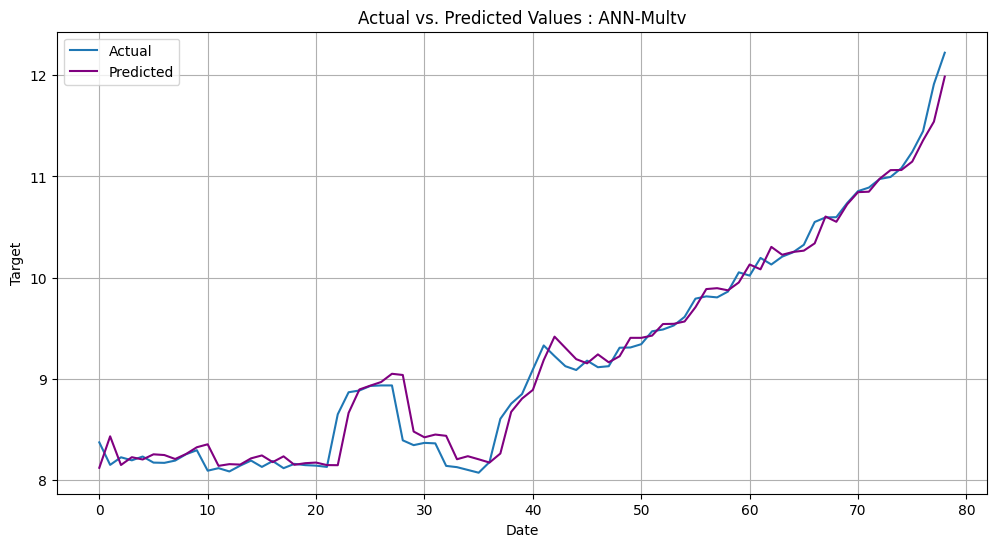

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted', color='purple')
plt.title('Actual vs. Predicted Values : ANN-Multv')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


## 4.2 ANN Model Evaluation

In [ ]:
# 8:2

# Calculate the mean squared error
mse_train = mean_squared_error(Y_train_act, train_predict)
mse_test = mean_squared_error(y_test, test_predict)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R²
r2_train = r2_score(Y_train_act, train_predict)
r2_test = r2_score(y_test, test_predict)

# Calculate MAE
mae_train = mean_absolute_error(Y_train_act, train_predict)
mae_test = mean_absolute_error(y_test, test_predict)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(Y_train_act, train_predict)
mape_test = mean_absolute_percentage_error(y_test, test_predict)

# Print the metrics
print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')
print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')
print(f'Training R²: {r2_train}')
print(f'Testing R²: {r2_test}')
print(f'Training MAE: {mae_train}')
print(f'Testing MAE: {mae_test}')
print(f'Training MAPE: {mape_train}')
print(f'Testing MAPE: {mape_test}')


Training MSE: 0.03315294688645686
Testing MSE: 0.023045617200859778
Training RMSE: 0.1820795070469405
Testing RMSE: 0.15180782984042615
Training R²: 0.9966624641509513
Testing R²: 0.980014135927925
Training MAE: 0.11116626008811521
Testing MAE: 0.10074750344964532
Training MAPE: 1.3138155589200629
Testing MAPE: 1.114089641241815


## 4.3 ANN Actual vs Predicted Scatter Plot

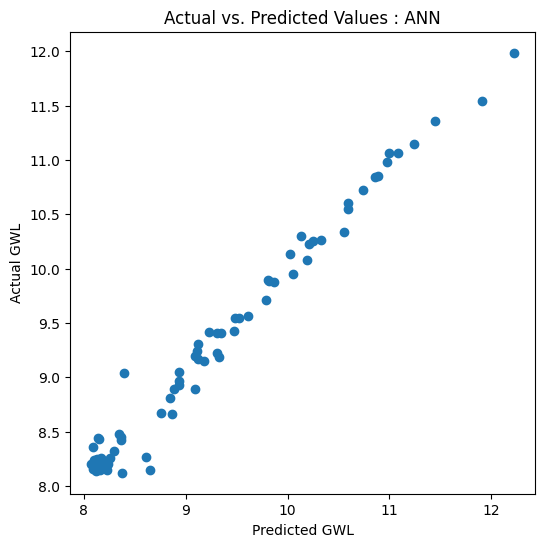

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test,test_predict )
plt.title('Actual vs. Predicted Values : ANN')
plt.xlabel('Predicted GWL')
plt.ylabel('Actual GWL')
plt.show()

## 4.4 ANN Cross-Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation
rnn_rmses = []
for train_index, test_index in tscv.split(X):
    val_X_train, val_X_test = X[train_index], X[test_index]
    val_y_train, val_y_test = Y[train_index], Y[test_index]

    # Create and train the RNN model
    best_model.fit(val_X_train, val_y_train, epochs=20)
    # Evaluate the model
    y_pred = best_model.predict(val_X_test)
    rmse = np.sqrt(mean_squared_error(inverse(y_scaler,val_y_test), inverse(y_scaler,y_pred)))
    rnn_rmses.append(rmse)
    print(f'Fold RMSE: {rmse}')

# Print average RMSE across folds
print(f'Average cross-validation RMSE: {np.mean(rnn_rmses)}')

Epoch 1/20
3/3 [==============================] - 0s 5ms/step - loss: 1.4435e-04 - mean_absolute_error: 0.0075
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 1.3644e-04 - mean_absolute_error: 0.0078
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 1.4381e-04 - mean_absolute_error: 0.0082
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 1.3593e-04 - mean_absolute_error: 0.0076
Epoch 5/20
3/3 [==============================] - 0s 5ms/step - loss: 1.4659e-04 - mean_absolute_error: 0.0077
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 1.2916e-04 - mean_absolute_error: 0.0076
Epoch 7/20
3/3 [==============================] - 0s 5ms/step - loss: 1.3873e-04 - mean_absolute_error: 0.0083
Epoch 8/20
3/3 [==============================] - 0s 5ms/step - loss: 1.2685e-04 - mean_absolute_error: 0.0072
Epoch 9/20
3/3 [==============================] - 0s 5ms/step - loss: 1.3940e-04 - mean_absolute_error: 0.0076
E

# Creating TimeStamp Data

In [ ]:
def create_dataset(s_x,s_y, time_step=1):
    Xs, Ys = [], []
    for i in range(len(s_x) - time_step - 1):
        a = s_x[i:(i + time_step), :]
        Xs.append(a)
        Ys.append(s_y[i + time_step])
    return np.array(Xs), np.array(Ys)

time_step = 4  # Look-back period of 4

Xs, Ys = create_dataset(scaled_x,scaled_y, time_step)

# Reshape input to be [samples, time steps, features]
Xs = Xs.reshape(Xs.shape[0], Xs.shape[1], Xs.shape[2])

In [ ]:
Xs.shape

(390, 4, 8)

In [ ]:
train_size = int(len(Xs) * 0.8)
test_size = len(Xs) - train_size
X_train_ts, X_test_ts = Xs[:train_size], Xs[train_size:]
Y_train_ts, Y_test_ts = Ys[:train_size], Ys[train_size:]

# 5. RNN Model Training

In [ ]:
from tensorflow.keras.initializers import Orthogonal, glorot_uniform, HeNormal

In [ ]:
from tensorflow.keras.layers import SimpleRNN,LSTM,GRU

In [ ]:
def build_model_rnn(hp):
  model = Sequential()
  model.add(SimpleRNN(
        units=hp.Int('units', min_value=32, max_value=128, step=16),
        activation='relu',
    input_shape=(time_step, Xs.shape[2]))),
  model.add(Dense(1))
  model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mse'
    )
  return model

In [ ]:
tuner_rnn = kt.RandomSearch(
    build_model_rnn,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir_rns',
    project_name='time_series_rns'
)



tuner_rnn.search(X_train_ts, Y_train_ts, epochs=100, validation_data=(X_test_ts, Y_test_ts), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Trial 10 Complete [00h 00m 11s]
val_loss: 0.012288160505704582

Best val_loss So Far: 0.0018373506027273834
Total elapsed time: 00h 03m 15s


In [ ]:
best_model_rnn = tuner_rnn.get_best_models(num_models=1)[0]

In [ ]:
best_model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 80)                7120      
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 7201 (28.13 KB)
Trainable params: 7201 (28.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Get the best hyperparameters
best_hyperparameters = tuner_rnn.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

Best hyperparameters: {'units': 80, 'learning_rate': 0.004263664986805526}


In [ ]:
trials = tuner_rnn.oracle.get_best_trials(num_trials=10)

# Extract relevant information from each trial
history = []
for trial in trials:
    trial_info = {
        'trial_id': trial.trial_id,
        'hyperparameters': trial.hyperparameters.values,
        'score': trial.score
    }
    history.append(trial_info)

In [ ]:
history

[{'trial_id': '02',
  'hyperparameters': {'units': 80, 'learning_rate': 0.004263664986805526},
  'score': 0.0018373506027273834},
 {'trial_id': '03',
  'hyperparameters': {'units': 96, 'learning_rate': 0.001989751755243559},
  'score': 0.001966084470041096},
 {'trial_id': '01',
  'hyperparameters': {'units': 112, 'learning_rate': 0.0005580490517344697},
  'score': 0.0022110227146185935},
 {'trial_id': '06',
  'hyperparameters': {'units': 32, 'learning_rate': 0.0033710341251377745},
  'score': 0.0022171178716234863},
 {'trial_id': '00',
  'hyperparameters': {'units': 80, 'learning_rate': 0.00014098552596271755},
  'score': 0.0022227041190490127},
 {'trial_id': '04',
  'hyperparameters': {'units': 80, 'learning_rate': 0.00012763132071644807},
  'score': 0.003156282822601497},
 {'trial_id': '08',
  'hyperparameters': {'units': 80, 'learning_rate': 0.00010406284012562844},
  'score': 0.003612169995903969},
 {'trial_id': '05',
  'hyperparameters': {'units': 64, 'learning_rate': 0.0001233725

## 5.1 RNN Prediction

In [ ]:
train_predict_rnn = inverse(y_scaler,best_model_rnn.predict(X_train_ts))
test_predict_rnn = inverse(y_scaler,best_model_rnn.predict(X_test_ts))

3/3 [==============================] - 0s 6ms/step


In [ ]:
Y_train_act = inverse(y_scaler,Y_train_ts)
y_test = inverse(y_scaler,Y_test_ts)

In [ ]:
pred_data = pred_data.iloc[:-1]

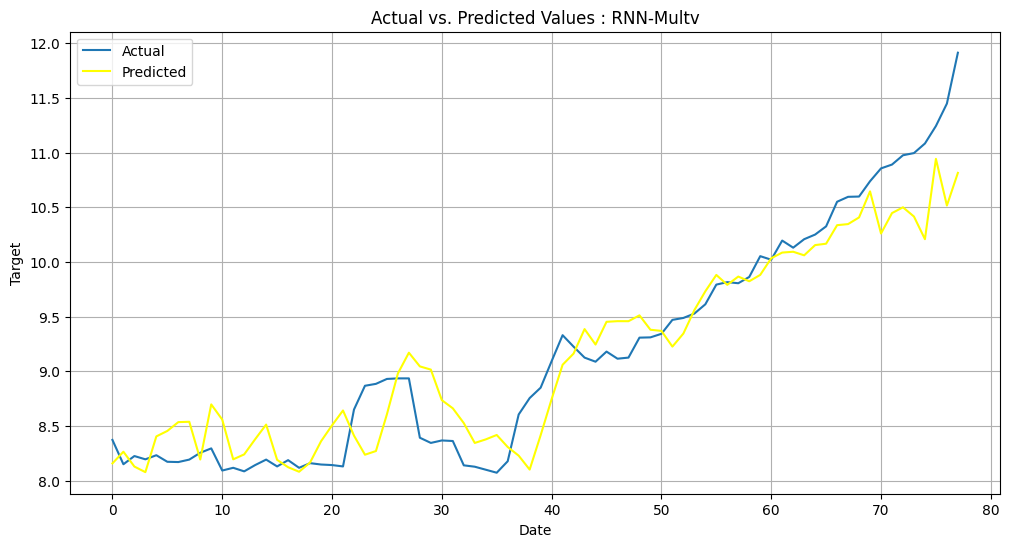

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predict_rnn, label='Predicted', color='yellow')
plt.title('Actual vs. Predicted Values : RNN-Multv')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

## 5.2 RNN Model Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_rnn = mean_squared_error(Y_train_act, train_predict_rnn)
mse_test_rnn = mean_squared_error(y_test, test_predict_rnn)

# Calculate RMSE
rmse_train_rnn = np.sqrt(mse_train_rnn)
rmse_test_rnn = np.sqrt(mse_test_rnn)

# Calculate R²
r2_train_rnn = r2_score(Y_train_act, train_predict_rnn)
r2_test_rnn = r2_score(y_test, test_predict_rnn)

# Calculate MAE
mae_train_rnn = mean_absolute_error(Y_train_act, train_predict_rnn)
mae_test_rnn = mean_absolute_error(y_test, test_predict_rnn)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_rnn = mean_absolute_percentage_error(Y_train_act, train_predict_rnn)
mape_test_rnn = mean_absolute_percentage_error(y_test, test_predict_rnn)

# Print the metrics
print(f'Training MSE: {mse_train_rnn}')
print(f'Testing MSE: {mse_test_rnn}')
print(f'Training RMSE: {rmse_train_rnn}')
print(f'Testing RMSE: {rmse_test_rnn}')
print(f'Training R²: {r2_train_rnn}')
print(f'Testing R²: {r2_test_rnn}')
print(f'Training MAE: {mae_train_rnn}')
print(f'Testing MAE: {mae_test_rnn}')
print(f'Training MAPE: {mape_train_rnn}')
print(f'Testing MAPE: {mape_test_rnn}')


Training MSE: 0.11509588270104726
Testing MSE: 0.1252579104893097
Training RMSE: 0.33925784103104717
Testing RMSE: 0.3539179431581701
Training R²: 0.9885584290131446
Testing R²: 0.8806782854805845
Training MAE: 0.2514782755156576
Testing MAE: 0.275089292770777
Training MAPE: 2.8541032257971883
Testing MAPE: 2.98435545492912


## 5.3 RNN Actual vs Predicted Scatter Plot

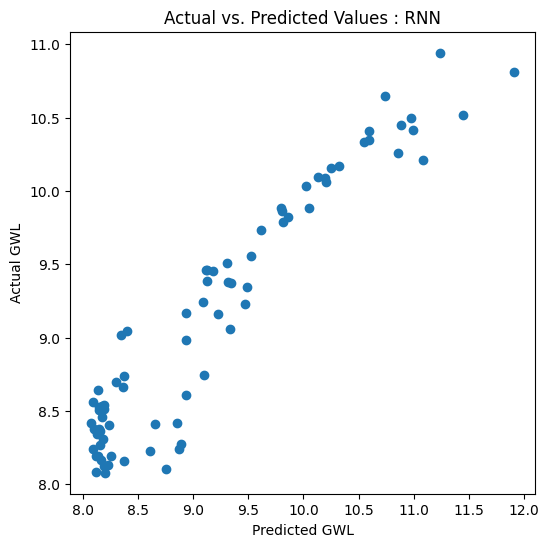

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test,test_predict_rnn)
plt.title('Actual vs. Predicted Values : RNN')
plt.xlabel('Predicted GWL')
plt.ylabel('Actual GWL')
plt.show()

## 5.4 RNN Cross-Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation
rnn_rmses = []
for train_index, test_index in tscv.split(Xs):
    val_X_train, val_X_test = Xs[train_index], Xs[test_index]
    val_y_train, val_y_test = Ys[train_index], Ys[test_index]

    # Create and train the RNN model
    best_model_rnn.fit(val_X_train, val_y_train, epochs=20)
    # Evaluate the model
    y_pred = best_model_rnn.predict(val_X_test)
    rmse = np.sqrt(mean_squared_error(inverse(y_scaler,val_y_test), inverse(y_scaler,y_pred)))
    rnn_rmses.append(rmse)
    print(f'Fold RMSE: {rmse}')

# Print average RMSE across folds
print(f'Average cross-validation RMSE: {np.mean(rnn_rmses)}')

Epoch 1/20
3/3 [==============================] - 1s 7ms/step - loss: 9.9897e-04
Epoch 2/20
3/3 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 3/20
3/3 [==============================] - 0s 6ms/step - loss: 6.2494e-04
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 8.1244e-04
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 6.0413e-04
Epoch 6/20
3/3 [==============================] - 0s 6ms/step - loss: 5.8105e-04
Epoch 7/20
3/3 [==============================] - 0s 5ms/step - loss: 9.6996e-04
Epoch 8/20
3/3 [==============================] - 0s 6ms/step - loss: 4.8158e-04
Epoch 9/20
3/3 [==============================] - 0s 5ms/step - loss: 5.1862e-04
Epoch 10/20
3/3 [==============================] - 0s 5ms/step - loss: 5.0747e-04
Epoch 11/20
3/3 [==============================] - 0s 6ms/step - loss: 4.0706e-04
Epoch 12/20
3/3 [==============================] - 0s 6ms/step - loss: 3.8535e-04
Epoch 13/20
3/3 [============

# 6. LSTM Model Training

In [ ]:
def build_model_lstm(hp):
  model = Sequential()
  model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=16),
        activation='relu',
    input_shape=(time_step, Xs.shape[2]))),
  model.add(Dense(1))
  model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mse'
    )
  return model

In [ ]:
tuner_lstm = kt.RandomSearch(
    build_model_lstm,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir_lstm',
    project_name='time_series_lstm'
)



tuner_lstm.search(X_train_ts, Y_train_ts, epochs=50, validation_data=(X_test_ts, Y_test_ts), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Trial 10 Complete [00h 00m 27s]
val_loss: 0.009652046952396631

Best val_loss So Far: 0.0016889764228835702
Total elapsed time: 00h 02m 41s


In [ ]:
best_model_lstm = tuner_lstm.get_best_models(num_models=1)[0]

In [ ]:
best_model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48)                10944     
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 10993 (42.94 KB)
Trainable params: 10993 (42.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Get the best hyperparameters
best_hyperparameters = tuner_lstm.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

Best hyperparameters: {'units': 48, 'learning_rate': 0.007765767620141046}


In [ ]:
trials = tuner_lstm.oracle.get_best_trials(num_trials=10)

# Extract relevant information from each trial
history = []
for trial in trials:
    trial_info = {
        'trial_id': trial.trial_id,
        'hyperparameters': trial.hyperparameters.values,
        'score': trial.score
    }
    history.append(trial_info)

In [ ]:
history

[{'trial_id': '00',
  'hyperparameters': {'units': 48, 'learning_rate': 0.007765767620141046},
  'score': 0.0016889764228835702},
 {'trial_id': '06',
  'hyperparameters': {'units': 80, 'learning_rate': 0.0015533847398057849},
  'score': 0.0017120384145528078},
 {'trial_id': '02',
  'hyperparameters': {'units': 64, 'learning_rate': 0.003378131836989523},
  'score': 0.0017172926454804838},
 {'trial_id': '07',
  'hyperparameters': {'units': 32, 'learning_rate': 0.0029860644714577917},
  'score': 0.00173907948192209},
 {'trial_id': '08',
  'hyperparameters': {'units': 128, 'learning_rate': 0.0028209709086056147},
  'score': 0.0018298921640962362},
 {'trial_id': '03',
  'hyperparameters': {'units': 64, 'learning_rate': 0.003366336681373164},
  'score': 0.0020028679282404482},
 {'trial_id': '04',
  'hyperparameters': {'units': 64, 'learning_rate': 0.0011152022780492703},
  'score': 0.0020192847005091608},
 {'trial_id': '05',
  'hyperparameters': {'units': 96, 'learning_rate': 0.0002569108524

## 6.1 LSTM Prediction

In [ ]:
train_predict_lstm = inverse(y_scaler,best_model_lstm.predict(X_train_ts))
test_predict_lstm = inverse(y_scaler,best_model_lstm.predict(X_test_ts))

3/3 [==============================] - 0s 5ms/step


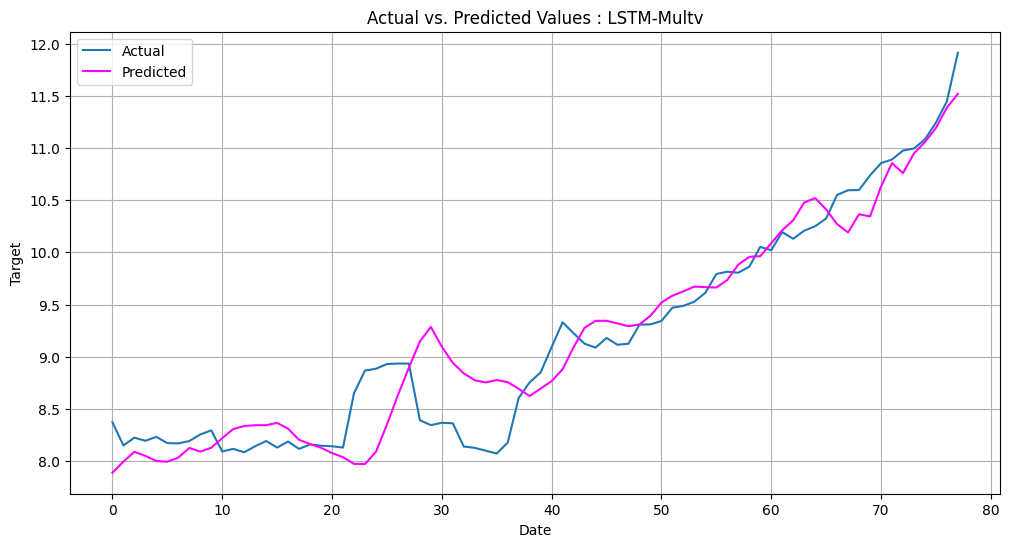

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predict_lstm, label='Predicted', color='magenta')
plt.title('Actual vs. Predicted Values : LSTM-Multv')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


## 6.2 LSTM Model Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_lstm = mean_squared_error(Y_train_act,train_predict_lstm)
mse_test_lstm = mean_squared_error(y_test, test_predict_lstm)

# Calculate RMSE
rmse_train_lstm = np.sqrt(mse_train_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)

# Calculate R²
r2_train_lstm = r2_score(Y_train_act, train_predict_lstm)
r2_test_lstm = r2_score(y_test, test_predict_lstm)

# Calculate MAE
mae_train_lstm = mean_absolute_error(Y_train_act, train_predict_lstm)
mae_test_lstm = mean_absolute_error(y_test, test_predict_lstm)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_lstm = mean_absolute_percentage_error(Y_train_act, train_predict_lstm)
mape_test_lstm = mean_absolute_percentage_error(y_test, test_predict_lstm)

# Print the metrics
print(f'Training MSE: {mse_train_lstm}')
print(f'Testing MSE: {mse_test_lstm}')
print(f'Training RMSE: {rmse_train_lstm}')
print(f'Testing RMSE: {rmse_test_lstm}')
print(f'Training R²: {r2_train_lstm}')
print(f'Testing R²: {r2_test_lstm}')
print(f'Training MAE: {mae_train_lstm}')
print(f'Testing MAE: {mae_test_lstm}')
print(f'Training MAPE: {mape_train_lstm}')
print(f'Testing MAPE: {mape_test_lstm}')


Training MSE: 0.10714588876006012
Testing MSE: 0.11724419488545429
Training RMSE: 0.3273314661930016
Testing RMSE: 0.34240939660799946
Training R²: 0.9893487302635997
Testing R²: 0.8883122167970791
Training MAE: 0.22921765088685703
Testing MAE: 0.25194858159774386
Training MAPE: 2.6263845473447187
Testing MAPE: 2.849891104798669


## 6.3 LSTM Actual vs Predicted Scatter Plot

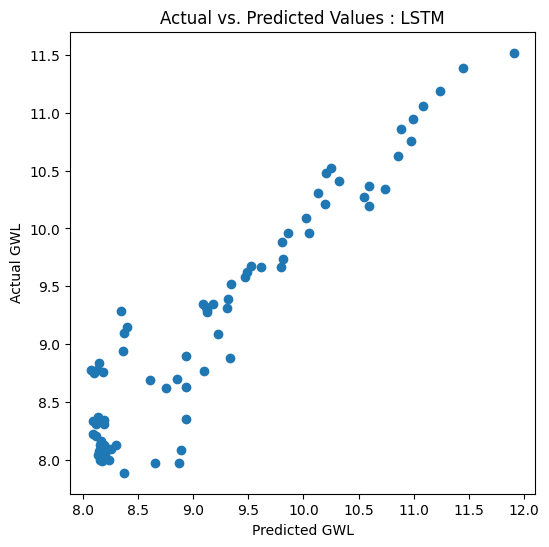

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test,test_predict_lstm)
plt.title('Actual vs. Predicted Values : LSTM')
plt.xlabel('Predicted GWL')
plt.ylabel('Actual GWL')
plt.show()

## 6.4 LSTM Cross-Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation
lstm_rmses = []
for train_index, test_index in tscv.split(Xs):
    val_X_train, val_X_test = Xs[train_index], Xs[test_index]
    val_y_train, val_y_test = Ys[train_index], Ys[test_index]

    # Create and train the RNN model
    best_model_lstm.fit(val_X_train, val_y_train, epochs=20)
    # Evaluate the model
    y_pred = best_model_lstm.predict(val_X_test)
    rmse = np.sqrt(mean_squared_error(inverse(y_scaler,val_y_test), inverse(y_scaler,y_pred)))
    lstm_rmses.append(rmse)
    print(f'Fold RMSE: {rmse}')

# Print average RMSE across folds
print(f'Average cross-validation RMSE: {np.mean(lstm_rmses)}')

Epoch 1/20
3/3 [==============================] - 2s 9ms/step - loss: 0.0011
Epoch 2/20
3/3 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 3/20
3/3 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 5/20
3/3 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 6/20
3/3 [==============================] - 0s 9ms/step - loss: 9.4303e-04
Epoch 7/20
3/3 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 8/20
3/3 [==============================] - 0s 12ms/step - loss: 9.6228e-04
Epoch 9/20
3/3 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 10/20
3/3 [==============================] - 0s 8ms/step - loss: 9.7218e-04
Epoch 11/20
3/3 [==============================] - 0s 9ms/step - loss: 8.3273e-04
Epoch 12/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 13/20
3/3 [==============================] - 0s 

# 7. GRU Model Training

In [ ]:
def build_model_gru(hp):
  model = Sequential()
  model.add(GRU(
        units=hp.Int('units', min_value=32, max_value=128, step=16),
        activation='relu',
    input_shape=(time_step, Xs.shape[2]))),
  model.add(Dense(1))
  model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mse'
    )
  return model

In [ ]:
tuner_gru = kt.RandomSearch(
    build_model_gru,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir_gru',
    project_name='time_series_gru'
)



tuner_gru.search(X_train_ts, Y_train_ts, epochs=50, validation_data=(X_test_ts, Y_test_ts), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Trial 10 Complete [00h 00m 19s]
val_loss: 0.0017662980826571584

Best val_loss So Far: 0.0012945158523507416
Total elapsed time: 00h 02m 52s


In [ ]:
best_model_gru = tuner_gru.get_best_models(num_models=1)[0]

In [ ]:
best_model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                14208     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 14273 (55.75 KB)
Trainable params: 14273 (55.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Get the best hyperparameters
best_hyperparameters = tuner_gru.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

Best hyperparameters: {'units': 64, 'learning_rate': 0.002939362078742221}


In [ ]:
trials = tuner_gru.oracle.get_best_trials(num_trials=10)

# Extract relevant information from each trial
history = []
for trial in trials:
    trial_info = {
        'trial_id': trial.trial_id,
        'hyperparameters': trial.hyperparameters.values,
        'score': trial.score
    }
    history.append(trial_info)

In [ ]:
history

[{'trial_id': '03',
  'hyperparameters': {'units': 64, 'learning_rate': 0.002939362078742221},
  'score': 0.0012945158523507416},
 {'trial_id': '08',
  'hyperparameters': {'units': 112, 'learning_rate': 0.0009762005500671626},
  'score': 0.0014393950696103275},
 {'trial_id': '04',
  'hyperparameters': {'units': 32, 'learning_rate': 0.003908373550672397},
  'score': 0.0015285922563634813},
 {'trial_id': '01',
  'hyperparameters': {'units': 112, 'learning_rate': 0.0006923370394694686},
  'score': 0.0017050165915861726},
 {'trial_id': '06',
  'hyperparameters': {'units': 128, 'learning_rate': 0.0007859385679703484},
  'score': 0.0017497355001978576},
 {'trial_id': '09',
  'hyperparameters': {'units': 80, 'learning_rate': 0.0015109090763929108},
  'score': 0.0017662980826571584},
 {'trial_id': '05',
  'hyperparameters': {'units': 96, 'learning_rate': 0.000427811650753089},
  'score': 0.0022078744368627667},
 {'trial_id': '02',
  'hyperparameters': {'units': 96, 'learning_rate': 0.000455205

## 7.1 GRU Prediction

In [ ]:
train_predict_gru = inverse(y_scaler,best_model_gru.predict(X_train_ts))
test_predict_gru = inverse(y_scaler,best_model_gru.predict(X_test_ts))

3/3 [==============================] - 0s 7ms/step


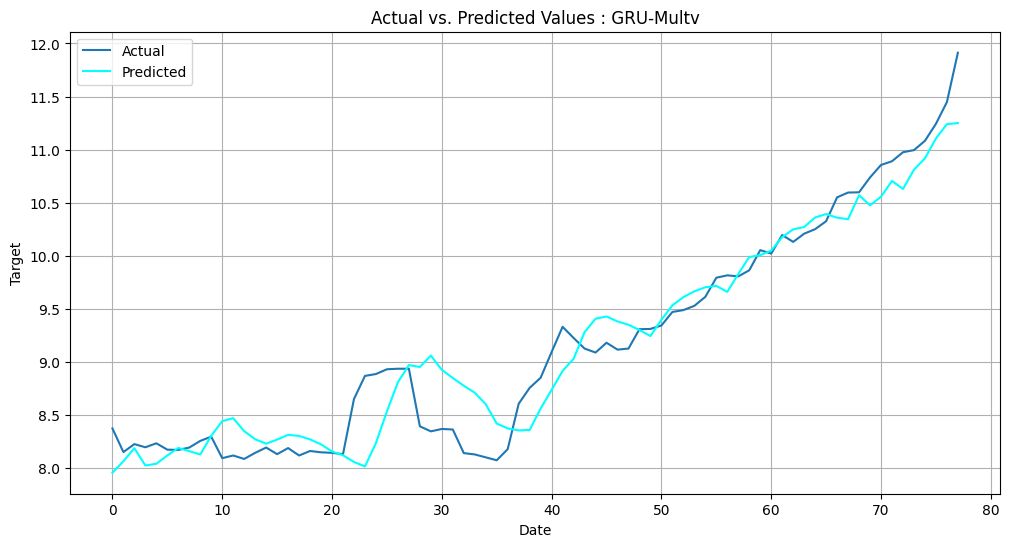

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predict_gru, label='Predicted', color='cyan')
plt.title('Actual vs. Predicted Values : GRU-Multv')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


## 7.2 GRU Model Evaluation

In [ ]:
# Calculate the mean squared error
mse_train_gru = mean_squared_error(Y_train_act, train_predict_gru)
mse_test_gru = mean_squared_error(y_test, test_predict_gru)

# Calculate RMSE
rmse_train_gru = np.sqrt(mse_train_gru)
rmse_test_gru = np.sqrt(mse_test_gru)

# Calculate R²
r2_train_gru = r2_score(Y_train_act, train_predict_gru)
r2_test_gru = r2_score(y_test, test_predict_gru)

# Calculate MAE
mae_train_gru = mean_absolute_error(Y_train_act, train_predict_gru)
mae_test_gru = mean_absolute_error(y_test, test_predict_gru)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_gru = mean_absolute_percentage_error(Y_train_act, train_predict_gru)
mape_test_gru = mean_absolute_percentage_error(y_test, test_predict_gru)

# Print the metrics
print(f'Training MSE: {mse_train_gru}')
print(f'Testing MSE: {mse_test_gru}')
print(f'Training RMSE: {rmse_train_gru}')
print(f'Testing RMSE: {rmse_test_gru}')
print(f'Training R²: {r2_train_gru}')
print(f'Testing R²: {r2_test_gru}')
print(f'Training MAE: {mae_train_gru}')
print(f'Testing MAE: {mae_test_gru}')
print(f'Training MAPE: {mape_train_gru}')
print(f'Testing MAPE: {mape_test_gru}')


Training MSE: 0.10071473111237773
Testing MSE: 0.08907748992192956
Training RMSE: 0.3173558430411795
Testing RMSE: 0.2984585229507269
Training R²: 0.9899880454591288
Testing R²: 0.9151440513333668
Training MAE: 0.21045975550277765
Testing MAE: 0.22531619414305082
Training MAPE: 2.4355797997946826
Testing MAPE: 2.5153931517697043


## 7.3 GRU Actual vs Predicted Scatter Plot

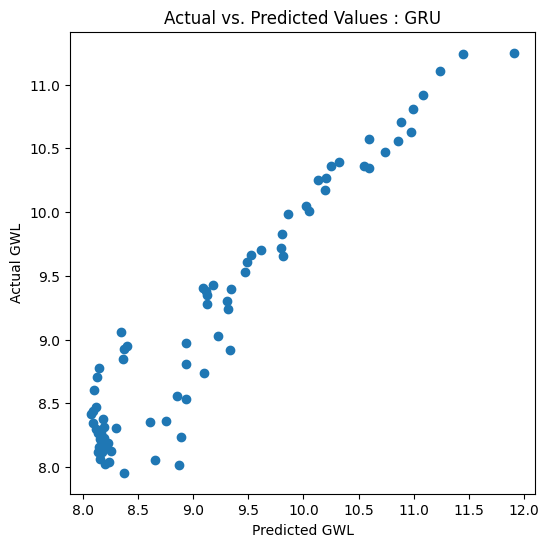

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test,test_predict_gru)
plt.title('Actual vs. Predicted Values : GRU')
plt.xlabel('Predicted GWL')
plt.ylabel('Actual GWL')
plt.show()

## 7.4 GRU Cross-Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation
gru_rmses = []
for train_index, test_index in tscv.split(Xs):
    val_X_train, val_X_test = Xs[train_index], Xs[test_index]
    val_y_train, val_y_test = Ys[train_index], Ys[test_index]

    # Create and train the RNN model
    best_model_gru.fit(val_X_train, val_y_train, epochs=20)
    # Evaluate the model
    y_pred = best_model_gru.predict(val_X_test)
    rmse = np.sqrt(mean_squared_error(inverse(y_scaler,val_y_test), inverse(y_scaler,y_pred)))
    gru_rmses.append(rmse)
    print(f'Fold RMSE: {rmse}')

# Print average RMSE across folds
print(f'Average cross-validation RMSE: {np.mean(gru_rmses)}')

Epoch 1/20
3/3 [==============================] - 2s 21ms/step - loss: 6.4798e-04
Epoch 2/20
3/3 [==============================] - 0s 10ms/step - loss: 6.0013e-04
Epoch 3/20
3/3 [==============================] - 0s 11ms/step - loss: 5.5120e-04
Epoch 4/20
3/3 [==============================] - 0s 12ms/step - loss: 5.5386e-04
Epoch 5/20
3/3 [==============================] - 0s 10ms/step - loss: 5.0866e-04
Epoch 6/20
3/3 [==============================] - 0s 11ms/step - loss: 6.8908e-04
Epoch 7/20
3/3 [==============================] - 0s 17ms/step - loss: 4.8509e-04
Epoch 8/20
3/3 [==============================] - 0s 14ms/step - loss: 4.5380e-04
Epoch 9/20
3/3 [==============================] - 0s 17ms/step - loss: 4.8867e-04
Epoch 10/20
3/3 [==============================] - 0s 13ms/step - loss: 4.2224e-04
Epoch 11/20
3/3 [==============================] - 0s 15ms/step - loss: 4.2014e-04
Epoch 12/20
3/3 [==============================] - 0s 15ms/step - loss: 4.4114e-04
Epoch 13/20
3